# Regression Analysis

In this notebook, we see how regression analysis can help to **understand the data behavior**, to **predict data values** (continuous or dichotomous), and to **find important predictors**.
We present different regression models: Simple linear regression, Multiple linear regression and Polynomial regression. 
We evaluate the results qualitatively by means of Seaborn visualization tools and quantitatively by means of Scikit-learn library.

We use different real data sets:
* Longley dataset of US macroeconomic data
* Prediction of the Price of a New Housing Data Market
* Sea Ice Extent and Climate Change
* Advertising dataset
* Diabetes Scikit-learn dataset
* The Big Mart Sales dataset

### Contents of the notebook:

- Simple and Multiple Linear Regression and Ordinary Least Squares
- Polynomial regression 
- Visualization (Seaborn)
- Prediction (Scikit-learn)
- Regularization and Sparse models 
- Statistics (StatsModel)

## How to make predictions about real-world quantities.

+  How does sales volume change with changes in price? How is it affected by weather?
+  How does affect the title of a book to sales?
+  How does the amount of a drug absorbed vary with body weight of patient? Does it depend on blood pressure?
+  How many customers can I expect today?
+  At what time should I go home to avoid the traffic jam?
+  What is the chance of rain for next two Mondays? What is the expected temperature?


Before starting, we can define some settings for the notebook:

In [1]:
import matplotlib.pylab as plt
%matplotlib inline 

In [2]:
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

In [3]:
import numpy as np

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

### Notation

$x_i$ element of a vector, $\textbf{x}$ column vector, $\textbf{x'}$ (transpose of $\textbf{x}$) row vector, $X$ matrix.

### From Data to Models

All these questions have a common structure: we are asking about one variable $\textbf{y}$ (*response*) that can be expressed as a combination of one or more (independent) variables $\textbf{x}_i$ (commonly called *covariates* or *predictors*).

The role of regression is to build a model (formula) to predict the response from the covariates.

## Linear Model

The simplest model we can think of is the **linear model**, where the response $\textbf{y}$ depends linearly from the covariates $\textbf{x}_i$:

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} $$

The $a_i$ are termed *parameters* of the model or *coefficients*.

This equation can be rewritten in a more compact (matricial) form as

$$ \textbf{y}  = X \textbf{w}$$

where $$ \textbf{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right), 
 X = \left( \begin{array}{c} x_{11}  \dots x_{1m} \\ x_{21}  \dots x_{2m}\\ \vdots \\ x_{n1}  \dots x_{nm} \end{array} \right),
 \textbf{w} = \left( \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right) $$
 
 **Linear regression** is the technique for creating linear models.
 
In the **simple** linear regression, with a single variable, we describe the relationship between the predictor and the response with a straight line. 

The model is:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

The parameter $a_0$ is called the *constant term* or the *intercept*.


**Example**: Does the insurance price depend on the driving experience?
Given the following information, the monthly auto insurance prices ($\textbf{y}$) and driving experiences in years ($\textbf{x}_{1}$) of a set of n subjects, we can build a linear model to answer this question.
We can also predict the monthly auto insurance price for a driver with 10 years of driving experience.

## Linear Regression 


Let's generate a set of data to illsutrate simple linear regression

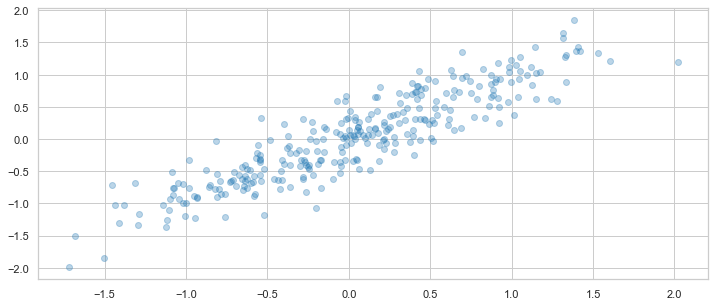

In [5]:
X1 = np.random.randn(300, 2)  # Random floats sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]]) # Transformation matrix
X2 = np.dot(X1, A)
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3) # alpha, transparency value, between 0 (transparent) and 1 (opaque).

We can create a linear model to explain the data

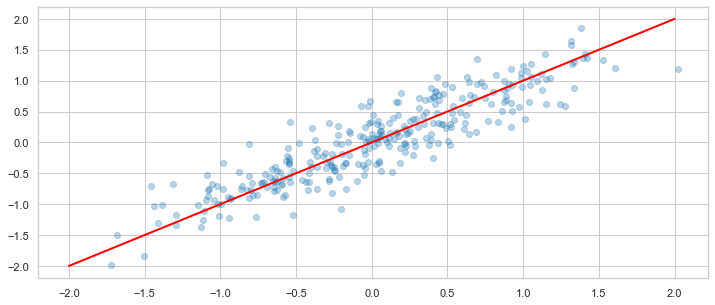

In [6]:
model=[0+1*x for x in np.arange(-2,3)] # np.arange returns evenly spaced values within a given interval.

plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3);
plt.plot(np.arange(-2,3), model,'r'); 
plt.show()
# The red line gives the predicted values of this model

But there are other linear models. 


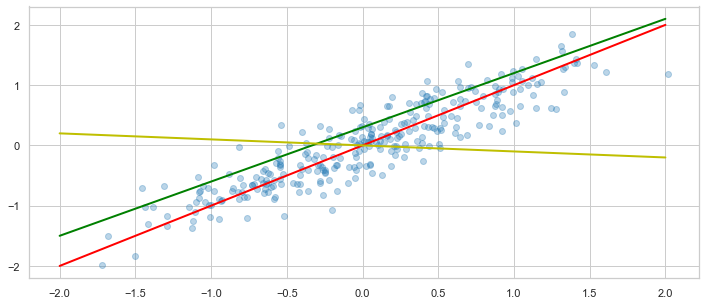

In [7]:
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3);
# We can use several parameters and we do not know which is the best model
model1=[0+1*x for x in np.arange(-2,3)]
model2=[0.3+0.9*x for x in np.arange(-2,3)]
model3=[0-0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1,'r')
plt.plot(np.arange(-2,3), model2,'g')
plt.plot(np.arange(-2,3), model3,'y')


#### Which is the best model for a set of samples?


## Ordinary Least Squares

$$\textbf{y} = a_0+a_1 \textbf{x}$$

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the two $a$'s are chosen to minimize the sum of squared distance between the predicted values and the actual values. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ with respect to $a_0, a_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.

## How to compute the OLS: Scipy.optimize

In [8]:
# To understand the use of zip in the next code:
list(zip([2,3,4,5,6],[40,50,60,70,80]))

[(2, 40), (3, 50), (4, 60), (5, 70), (6, 80)]

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(0, 20)

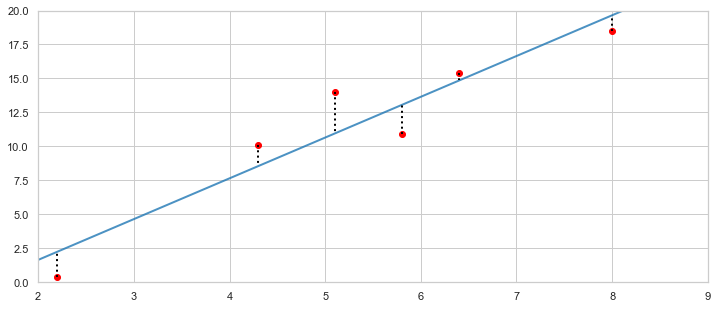

In [9]:
from scipy.optimize import fmin

x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
 
# Minimize the sum of squares using a lambda function

sse = lambda b, x, y: np.sum((y - b[0] - b[1]*x) ** 2) # Store the sum of squared differences function
# Lambda function is a small anonymous function. 
# It can take any number of arguments, but can only have one expression. 
# Syntax "lambda arguments : expression"

b0,b1 = fmin(sse, [0,1], args=(x,y)); # Minimize the sum of squared differences
# [0,1] is the initial guess for b[0] and b[1] in function sse.

plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10], alpha=0.8) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain

We can minimize other criteria, such as the **sum of absolute differences between the predicted values and the actual values**. 

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77


(0, 20)

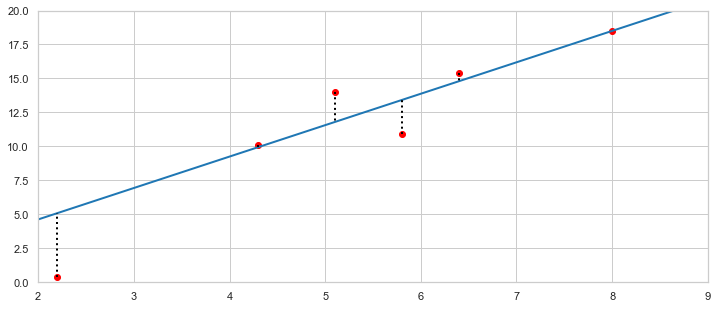

In [10]:
sabs = lambda b, x, y: np.sum(np.abs(y - b[0] - b[1]*x)) # Lambda function 
b0,b1 = fmin(sabs, [0,1], args=(x,y)) # Minimize the sum of absolute differences
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10]) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain

As you can see, in this case, far values are penalized less.

OLS is a popular approach for several reasons. 

+ It is computationally cheap to calculate the coefficients. 
+ It is easier to interpret than more sophisticated models. In situations where the goal is understanding a simple model in detail, rather than estimating the response well, they can provide insight into what the model captures. 
+ Finally, in situations where there is a lot of noise, it may be hard to find the true functional form, so a constrained model can perform quite well compared to a complex model which is more affected by noise.

The resulting model is represented as follows:

$$\widehat{\textbf{y}} = \widehat{a}_0+\widehat{a}_1 \textbf{x}$$

Here the hats on the variables represent the fact that they are estimated from the data we have available.

## Linear Regression Visualization: Seaborn

The ``lmplot()`` function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas ``DataFrame``. To plot, provide the predictor and response variable names along with the dataset

### Example 1:  Macroeconomic dataset

To start with we load the Longley dataset of US macroeconomic data from the R datasets website.

In [11]:
import pandas as pd
# Read data
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


Macroeconomic data from 1947 to 1962.

We will use the variable Total Derived Employment ('Employed') as our response $\textbf{y}$ and Gross National Product ('GNP') as our predictor $\textbf{x}$.

We also add a constant term so that we fit the intercept of our linear model: $X=(\textbf{1},\textbf{x})$

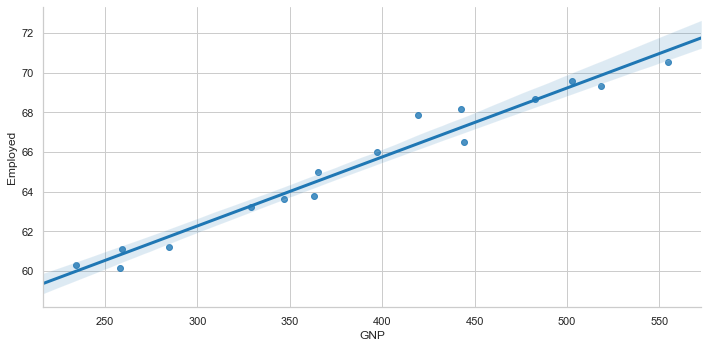

In [12]:
sns.lmplot("GNP", "Employed", df, aspect=2)

This plot has two main components. 

+ The first is a scatterplot, showing the observed datapoints. 
+ The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model.

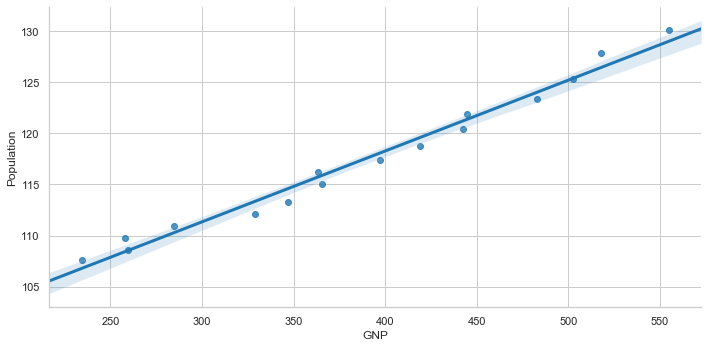

In [13]:
sns.lmplot("GNP", "Population", df, aspect=2);

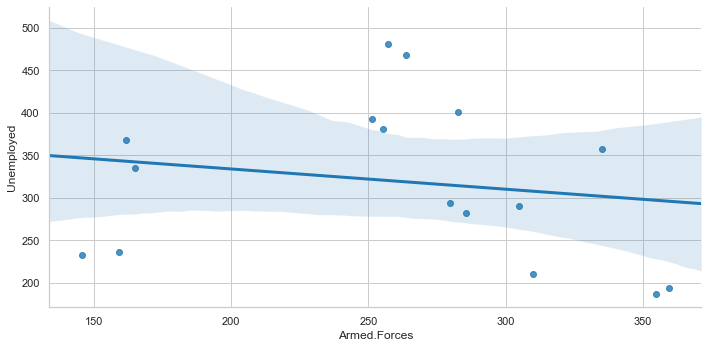

In [14]:
sns.lmplot("Armed.Forces", "Unemployed", df, aspect=2);

We can see signs of non linearity in the data which has not been captured by the model. 

In order to capture this non-linear effects, we have another type of regression known as polynomial regression. See below.

## Multiple Regression and Polynomial Regression
In Ordinary Least Squares Regression with a single variable we described the relationship between the predictor and the response with a straight line. This case is called *simple* linear regression. In the case of *multiple* linear regression we extend this idea by fitting a m-dimensional hyperplane to our m predictors.

$$ \textbf{y} = a_1 \textbf{x}_1 + \dots + a_m \textbf{x}_m = X \textbf{w} $$


Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

This very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. The higher the order of the polynomial the more "wigglier" functions you can fit. 

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

We can represent a curved relationship between our variables by introducing **polynomial** terms, as for example, a cubic model:


$$y_i \approx a_0 + a_1 x_i + a_2 x_i^2 + a_3 x_i^3$$

To illustrate the multiple regression we will use a new example (see example 2 below). 

To illustrate the polynomial regression follow with the previous example 1 of Macroeconomic data:

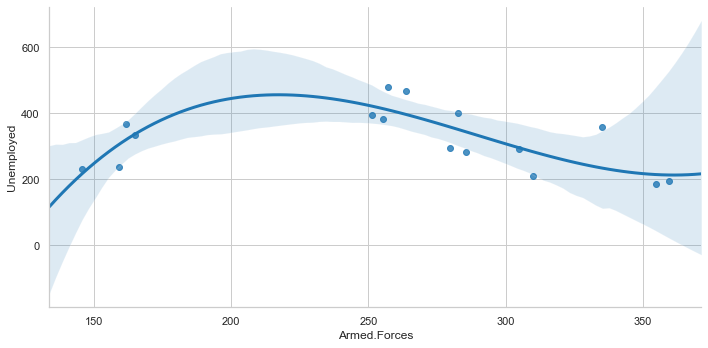

In [15]:
# Increase the order to estimate a polynomial regression
sns.lmplot("Armed.Forces", "Unemployed", df, order=3, aspect=2);

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**To complete**<p>
Try to use higher order models to the fitting of GNP with Population.

</div>

In [0]:
# Your code here

### Example 2: Housing Data

The Boston housing data set provides records measurements of 13 attributes of housing markets around Boston, as well as the median price. We want to predict the price of a market given a set of attributes.



To start with we load and visualize the data.

In [16]:
from sklearn import datasets
boston = datasets.load_boston() # Dictionary-like object that exposes its keys as attributes.
X_boston,y_boston = boston.data, boston.target # Create X matrix and y vector from the dataset.
print('Shape of data: {} {}'.format(X_boston.shape, y_boston.shape))

Shape of data: (506, 13) (506,)


Boston dataset has 506 instances and 13 attributes. 
Let's see the content of the dataset which are the keys the attributes or features and the general description:

In [17]:
print('keys: {}'.format(boston.keys()))
print('feature names: {}'.format(boston.feature_names))
print(boston.DESCR)

keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances 

Text(0, 0.5, 'count')

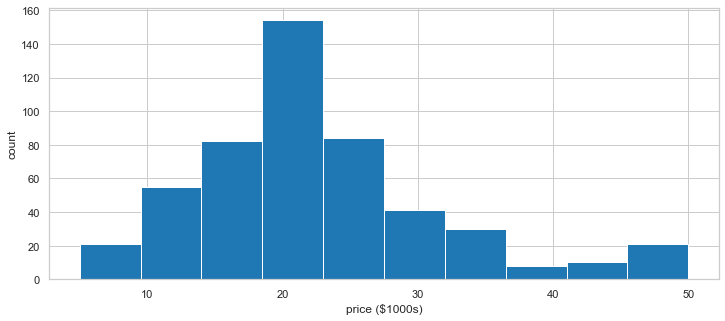

In [19]:
# Histogram of prices:
plt.hist(y_boston) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population".
Seaborn visualization can be used to show this linear relationships easily:

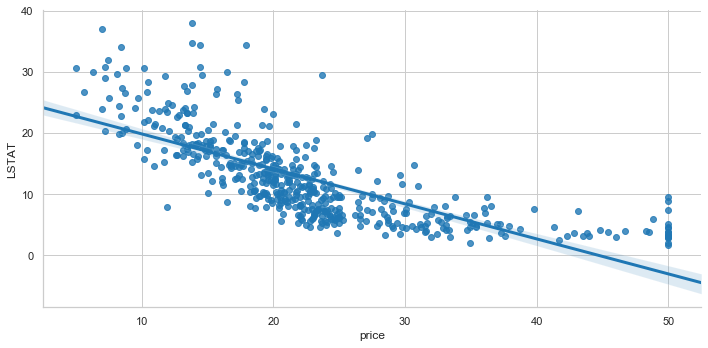

In [20]:
# Visualization of the relations between price and LSTAT
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names) # Create a DataFrame from the Boston dataset
df_boston['price'] = boston.target
sns.lmplot("price", "LSTAT", df_boston, aspect=2);

In [21]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Is the relationship between the house price and ``lstat`` non-linear? Is the straight line a poor fit? Maybe a better fit can be obtained by including higher order terms:

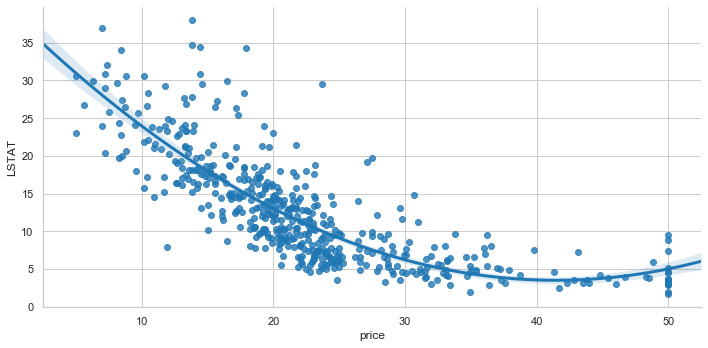

In [22]:
# Estimate a polynomial regression of order 2
sns.lmplot("price", "LSTAT", df_boston, order=2, aspect=2);

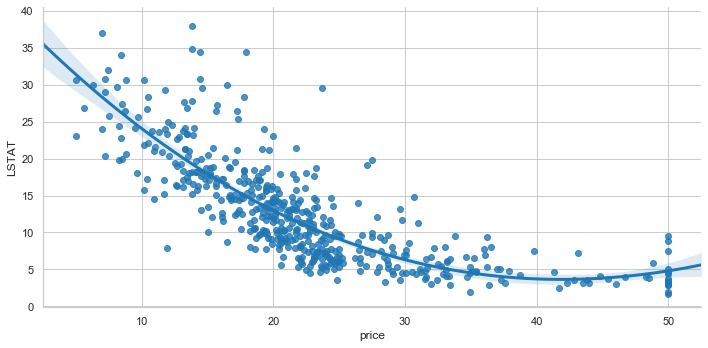

In [24]:
# Estimate a polynomial regression of order 3
sns.lmplot("price", "LSTAT", df_boston, order=3, aspect=2);

What if we consider variable RM or AGE?

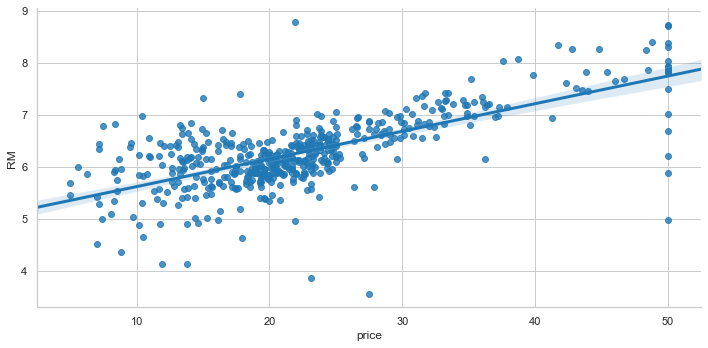

In [25]:
# Visualization of the relations between price and "average number of rooms per dwelling"
sns.lmplot("price", "RM", df_boston, aspect=2);

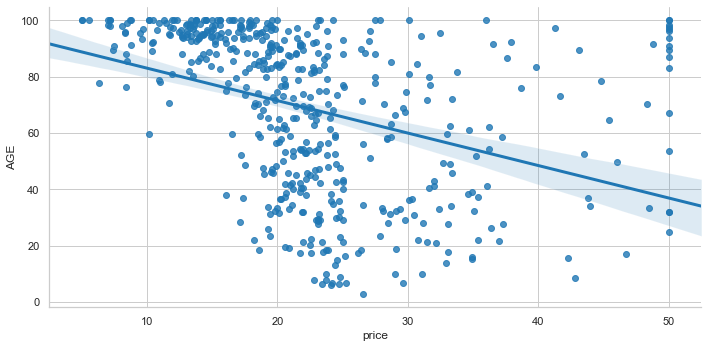

In [26]:
# Visualization of the relations between price and "proportion of owner-occupied units built prior to 1940"
sns.lmplot("price", "AGE", df_boston, aspect=2);

## More Visualizations

### Heatmap

We can also use corr and heatmap functions for studying the variables relationship, plotting a diagonal correlation matrix.

In [2]:
indexes=[0,2,4,5,6,12] # To plot just 7 of the 13 variables: PRICE, LSTAT, AGE, RM, NOX, INDUS, CRIM.
df_boston2 = pd.DataFrame(boston.data[:,indexes], columns=boston.feature_names[indexes])
df_boston2['PRICE'] = boston.target
corrmat = df_boston2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

NameError: name 'pd' is not defined

Using correlaton matrix heatmap we can observe that "RM" and "LSTAT" are the variables more correlated with "Price" (last row).

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Scatter plot matrix

Let's explore multiple variables relationships using a scatter plot matrix. The scatter plot is a grid of plots of multiple varaibles one against the other, showing the pairwise relationship of each variable to the others.

For the sake of visualization, we choose 3 from the set of 13 variables:

In [27]:
print(boston.feature_names)
indexes3=[5,6,12]
print(boston.feature_names[indexes3])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['RM' 'AGE' 'LSTAT']


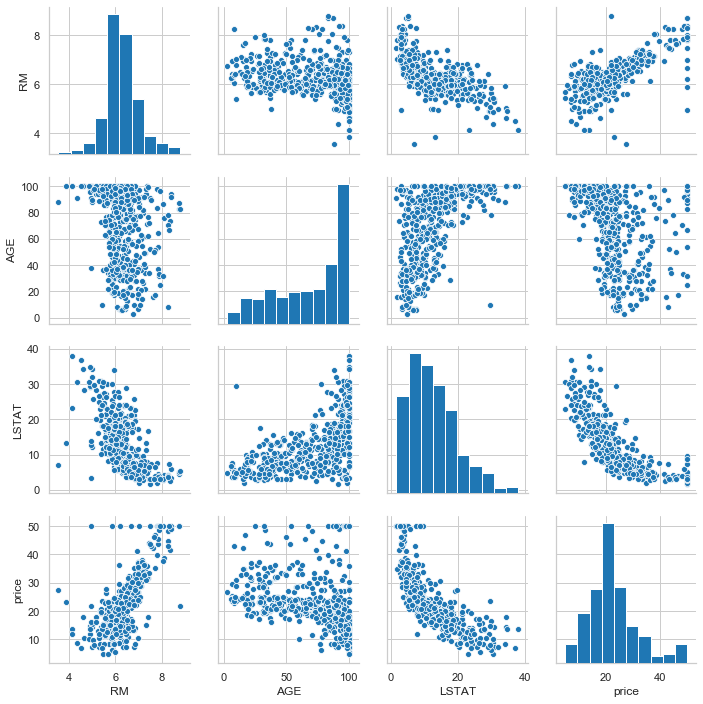

In [28]:
df_boston3 = pd.DataFrame(boston.data[:,indexes3], columns=boston.feature_names[indexes3])
df_boston3['price'] = boston.target
sns.pairplot(df_boston3) # Plot pairwise relationships in the dataset

We can visually analyze the pairwise relationships in the scatter plots. The diagonal axe contains a plot to show the univariate distribution of the data for the variable in that column.

You can create the same scatter plot matrix using the scatter_matrix method in pandas.tools.plotting:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001617D4F64A8>,
      dtype=object)

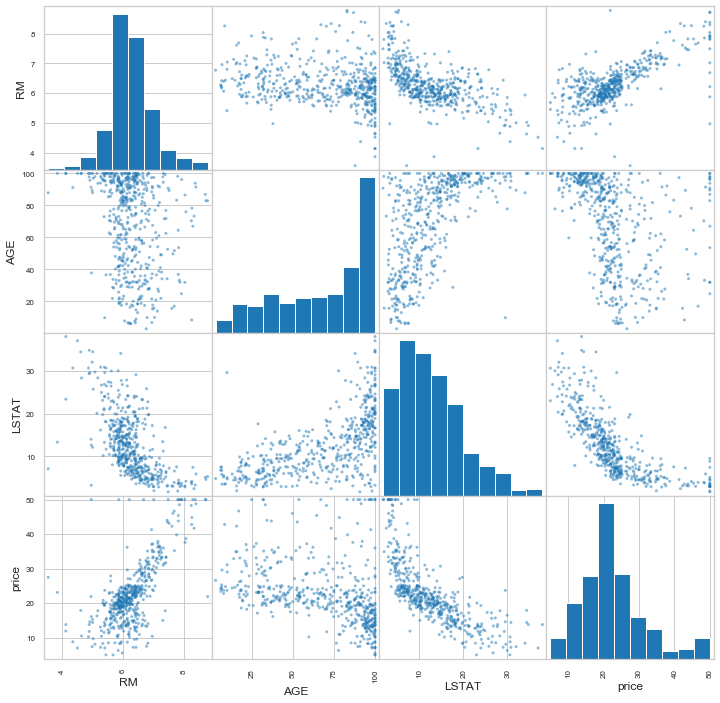

In [29]:
pd.plotting.scatter_matrix(df_boston3, figsize=(12.0,12.0))  

## Prediction and evaluation

Let's make predictions using **Scikit-learn**. 

Scikit-learn is a library that provides a variety of both supervised and unsupervised machine learning techniques. Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. 

The <code>Estimator.fit</code> method sets the state of the estimator based on the *training data*. Usually, the data is comprised of a two-dimensional numpy array $X$ of shape <code>(n_samples, n_predictors)</code> that holds the so-called *feature matrix* and a one-dimensional numpy array $\textbf{y}$ that holds the *responses*. Some estimators allow the user to control the fitting behavior. 
Estimators that can generate predictions provide a ``Estimator.predict`` method. 
In the case of regression, ``Estimator.predict`` will return the predicted regression values, $\widehat{\textbf{y}}$. 

During the fitting process, the state of the estimator is stored in the instance attributes that have a trailing underscore (``'_'``). For example, the coefficients of a ``LinearRegression`` estimator are stored in the attribute ``coef_``. Let's see a toy example:

In [31]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # Create the Linear Regression estimator
reg.fit ([[0, 1], [1, 1], [2, 1]], [0, 1, 2])  # Perform the fitting
reg.coef_

array([1., 0.])

We can evaluate the model fitting by computing the mean squared error ($MSE$) and the coefficient of determination ($R^2$) of the model.

The coefficient $R^2$ is defined as $(1 - \textbf{u}/\textbf{v})$, where $\textbf{u}$ is the residual sum of squares: $$\textbf{u}=\sum (\textbf{y} - \widehat{\textbf{y}} )^2$$ where ${\textbf{y}}$ is the observed response and $\widehat{\textbf{y}}$ is the predicted response.

And $\textbf{v}$ is the total sum of squares: $$\textbf{v}=\sum (\textbf{y} - \bar{\textbf{y}})^2,$$ where $\bar{\textbf{y}}$ is the mean of the observed data.

The best possible score for $R^2$ is 1.0 (when $\textbf{u}=0$): lower values are worse. $R^2$ is 0.0 when $\textbf{u}=\textbf{v}$.


We will split the Boston data into training set and testing set:

In [32]:
train_size = np.floor(X_boston.shape[0]/2)
int(train_size)

253

In [33]:
X_boston.shape

(506, 13)

In [35]:
train_size = int(X_boston.shape[0]/2)
X_train = X_boston[:train_size]
X_test = X_boston[train_size:]
y_train = y_boston[:train_size]
y_test = y_boston[train_size:]
print('Train and test sizes {} {}'.format(X_train.shape, X_test.shape))

regr_boston = LinearRegression()  # Create the Linear Regression estimator
regr_boston.fit(X_train, y_train) # Perform the fitting
print('Coeff and intercept: {} {}'.format(regr_boston.coef_, regr_boston.intercept_))

# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Training Score: {}'.format(regr_boston.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_boston.score(X_test, y_test)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_boston.predict(X_train) - y_train)**2)))
print('Testing MSE: {}'.format(np.mean((regr_boston.predict(X_test) - y_test)**2)))

Train and test sizes (253, 13) (253, 13)
Coeff and intercept: [ 1.20133313  0.02449686  0.00999508  0.42548672 -8.44272332  8.87767164
 -0.04850422 -1.11980855  0.20377571 -0.01597724 -0.65974775  0.01777057
 -0.11480104] -10.017430582945078
Training Score: 0.8557827200735684
Testing Score: -2.252734342392449
Training MSE: 9.987517325463742
Testing MSE: 303.4368629265822


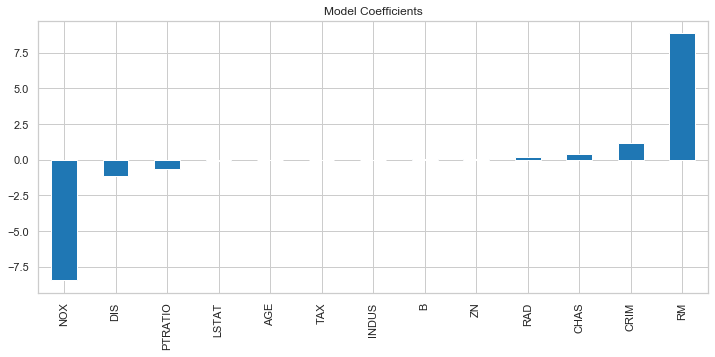

In [36]:
from pandas import Series
# Plotting model coefficients:
coef = Series(regr_boston.coef_, boston.feature_names).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

We can see that all the coefficients obtained are different from zero, meaning that no variable is discarded.
In future sessions, we will try to build a new model to predict the price using the most important factors and discarding the non-informative ones. For the curious ones, to do this we can create a LASSO regressor, forcing zero coefficients.

Let's evaluate the predictions by visualizing prediction errors.

Text(0, 0.5, 'Predicted price ($1000s)')

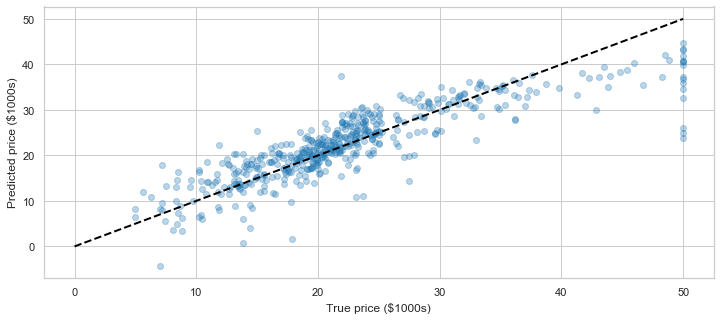

In [37]:
regr_boston_all = LinearRegression() # Create the Linear Regression estimator
regr_boston_all.fit(boston.data, boston.target) # Fitting with all the data (not just the training data) and all the features
predicted = regr_boston_all.predict(boston.data) # Perform prediction of all the data

# Visualization of target and predicted responses of the boston data:
plt.scatter(boston.target, predicted, alpha=0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

Text(0.5, 1.0, 'Residual plot')

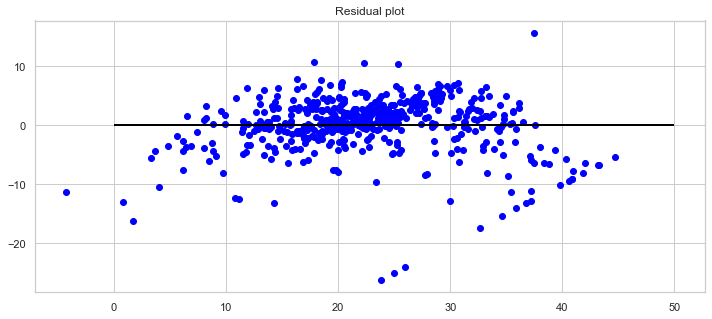

In [38]:
x_plot = plt.scatter(predicted, (predicted - boston.target), c='b')
plt.hlines(y=0, xmin= 0, xmax=50)
plt.title('Residual plot')

Model evaluation:

In [39]:
print('Score: {}'.format(regr_boston_all.score(boston.data, boston.target)))  # Best possible score is 1.0, lower values are worse.

Score: 0.7406426641094095


In [40]:
# Score using a single feature
regr_feat1 = LinearRegression()
for i in np.arange(13):
    feat1=X_train[:,i:i+1]
    regr_feat1.fit(feat1, y_train)    
    print('Feature: {}'.format(boston.feature_names[i]))
    print('Score: {}'.format(regr_feat1.score(feat1, y_train)))

Feature: CRIM
Score: 0.05024843836202264
Feature: ZN
Score: 0.10206594240694711
Feature: INDUS
Score: 0.13068434569181497
Feature: CHAS
Score: 0.00018610373661331892
Feature: NOX
Score: 0.11130139266941119
Feature: RM
Score: 0.7699004053318655
Feature: AGE
Score: 0.11300215206715913
Feature: DIS
Score: 0.018087821597697507
Feature: RAD
Score: 0.0015003535946076507
Feature: TAX
Score: 0.05512205417475469
Feature: PTRATIO
Score: 0.13721073435814335
Feature: B
Score: 0.0463878641534512
Feature: LSTAT
Score: 0.5035503901281464


### Predict and Transform
There is a special type of ``Estimator`` called ``Transformer`` which transforms the input data -- e.g. selects a subset of the features or extracts new features based on the original ones.

One transformer that we will use here is ``sklearn.preprocessing.StandardScaler``. This transformer centers each predictor in ``X`` to have zero mean and unit variance and is useful.

In [41]:
y_train.shape

(253,)

In [42]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_train) # Create the transformer StandardScaler and perform the fitting for the training data

y_train2 = np.expand_dims(y_train, axis=1) # Expand the shape of the array from (253,) to (253, 1).
scalery = StandardScaler().fit(y_train2) # Create the transformer StandardScaler and perform the fitting for the target

print("\nBefore transformation:")
print('Training: Max {}, min {}, mean {}, and var {}'.format(np.max(y_train), np.min(y_train), np.mean(y_train), np.var(y_train)))
print('Testing: Max {}, min {}, mean {}, and var {}'.format(np.max(y_test), np.min(y_test), np.mean(y_test), np.var(y_test)))


# Normalization of train and test data using mean and variance of the training:
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train2)
X_test = scalerX.transform(X_test)
y_test2 = np.expand_dims(y_test, axis=1)
y_test = scalery.transform(y_test2)

print("\nAfter transformation:")
print('Training: Max {}, min {}, mean {}, and var {}'.format(np.max(y_train), np.min(y_train), np.mean(y_train), np.var(y_train)))
print('Testing: Max {}, min {}, mean {}, and var {}'.format(np.max(y_test), np.min(y_test), np.mean(y_test), np.var(y_test)))


Before transformation:
Training: Max 50.0, min 11.8, mean 24.307509881422927, and var 69.25326375978378
Testing: Max 50.0, min 5.0, mean 20.75810276679842, and var 93.28670311987378

After transformation:
Training: Max 3.0873514853387736, min -1.5029714532177498, mean -2.808469311304744e-16, and var 1.0
Testing: Max 3.0873514853387736, min -2.3200970024895917, mean -0.4265163585480787, and var 1.3470369200714334


Another good practice is to shuffle the data before divide it into train and test.

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE** Diabetes <p>

The diabetes dataset (from scikit-learn) consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.<p>

We will explore the performance of Linear Regression model for prediction.<p>

Fill the gaps of the exercise.

</div>

In [61]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X,y = diabetes.data, diabetes.target
print(X.shape, y.shape)
print(diabetes.DESCR)


(442, 10) (442,)
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more inf

In [59]:
from sklearn.utils import shuffle
X,y = shuffle(X,y,random_state=1)

Divide in training and testing sets and evaluate the prediction (using sklearn) with a simple and a multiple regression model:

For the simple model, first choose one of the dimensions of the data.

In [52]:
# Your code here
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Visualize the data using scatter plot (plt.scatter):

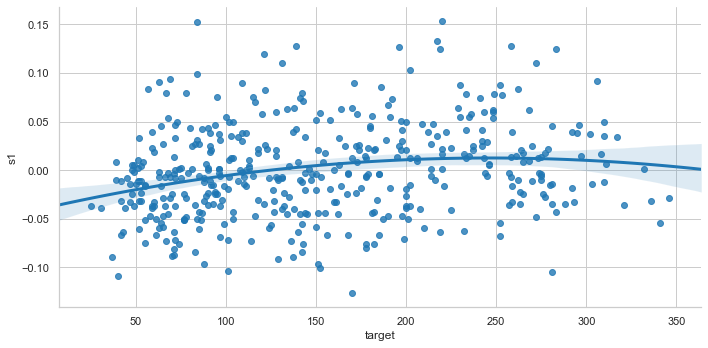

In [105]:
#try to do the plot with data and targe

df_diabetes["target"]= pd.DataFrame(diabetes.target, columns=["target"])

sns.lmplot( "target", "s1", df_diabetes,order=2,aspect=2)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001617ECEAAC8>,
      dtype=object)

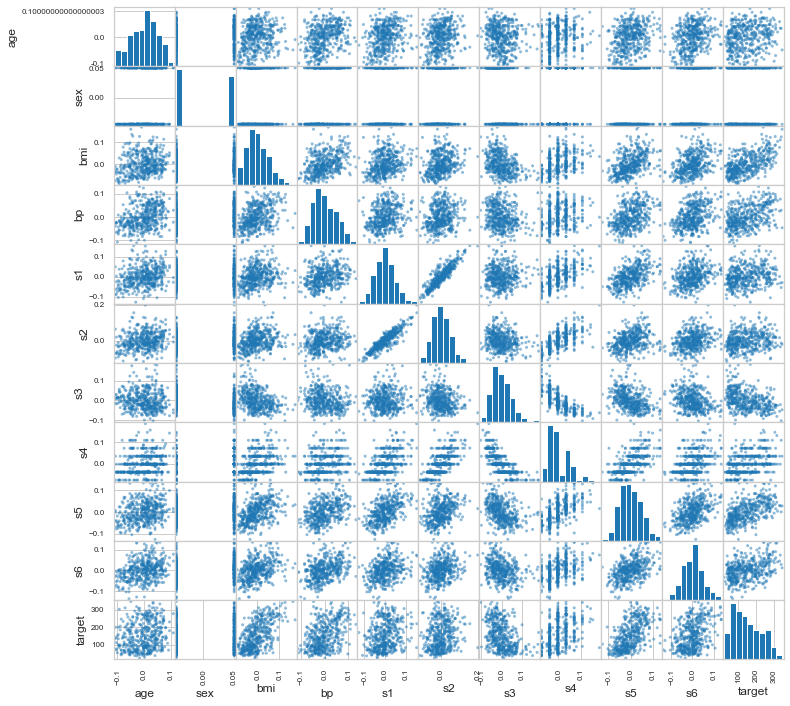

In [123]:
pd.plotting.scatter_matrix(df_diabetes, figsize=(12.0,12.0))  

Divide in training and testing sets and evaluate the prediction (sklearn):
Train and evaluate the score of the test set.
Calculate the Mean Squared Error on the train and test set:

In [155]:
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=55)

In [156]:
reg = LinearRegression().fit(X,y)  # Perform the fitting
reg.coef_
reg.score(X,y)

0.5177494254132934

In [157]:
regr_diabetes = LinearRegression().fit(X_train, y_train)
print('Coeff and intercept: {} {}'.format(regr_diabetes.coef_, regr_diabetes.intercept_))

# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Training Score: {}'.format(regr_diabetes.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_diabetes.score(X_test, y_test)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_diabetes.predict(X_train) - y_train)**2)))
print('Testing MSE: {}'.format(np.mean((regr_diabetes.predict(X_test) - y_test)**2)))

Coeff and intercept: [   2.28209639 -243.06926231  539.12313151  336.85925634 -919.46344958
  558.80744891  128.63369136  157.90836897  766.03360868   92.81951385] 154.42160491489363
Training Score: 0.5065695158331558
Testing Score: 0.5336701884564078
Training MSE: 2906.259764684662
Testing MSE: 2793.064387334461


Visualize the predicted line together with a scatter plot of the training set.


Text(0, 0.5, 'Predicted target')

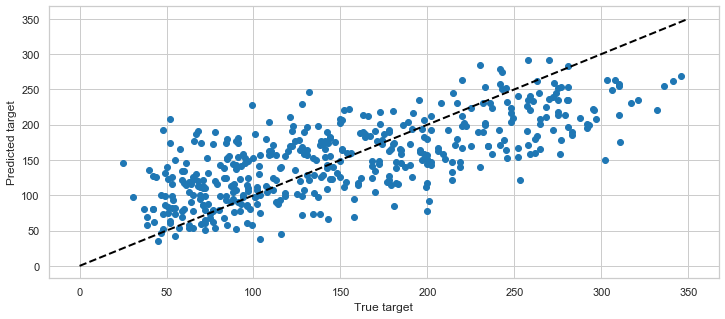

In [180]:
regr_diabetes_all = LinearRegression().fit(X, y) # Fitting with all the data (not just the training data) and all the features
predicted = regr_diabetes_all.predict(X) # Perform prediction of all the data

#predicted_y = regr_diabetes.predict(X_test)


plt.scatter(y, predicted, alpha=1)
plt.plot([0, 350], [0, 350], '--k')
plt.axis('tight')
plt.xlabel('True target')
plt.ylabel('Predicted target')






Text(0.5, 1.0, 'Residual plot')

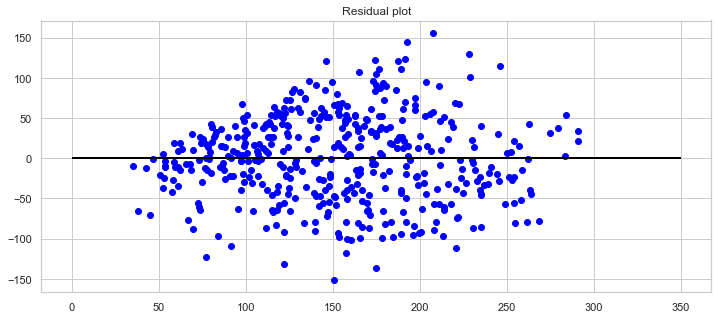

In [148]:
x_plot = plt.scatter(predicted, (predicted - diabetes.target), c='b')
plt.hlines(y=0, xmin= 0, xmax=350)
plt.title('Residual plot')

Visualize the predicted line together with a scatter plot of the training set.

In [140]:
# Your code here



For multiple regression model divide in training and testing sets and evaluate the prediction (sklearn).

In [145]:
# Your code here
print('Score: {}'.format(regr_diabetes_all.score(diabetes.data, diabetes.target)))  # Best possible score is 1.0, lower values are worse.

Score: 0.5177494254132934


Is the score improving using all 10 variables?

In [146]:
# Your solution here
# Score using a single feature
regr_feat1 = LinearRegression()
for i in np.arange(13):
    feat1=X_train[:,i:i+1]
    regr_feat1.fit(feat1, y_train)    
    print('Feature: {}'.format(diabetes.feature_names[i]))
    print('Score: {}'.format(regr_feat1.score(feat1, y_train)))

Feature: age
Score: 0.028674334831914727
Feature: sex
Score: 0.0023074811546656138
Feature: bmi
Score: 0.3342268267362246
Feature: bp
Score: 0.18370103974255214
Feature: s1
Score: 0.026204804926738934
Feature: s2
Score: 0.021748552002951782
Feature: s3
Score: 0.16480315733403283
Feature: s4
Score: 0.1749601451017505
Feature: s5
Score: 0.28651909841188206
Feature: s6
Score: 0.16048995458613025


ValueError: Found array with 0 feature(s) (shape=(309, 0)) while a minimum of 1 is required.